<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Load and prepare dataset
df = pd.read_csv('pima-indians-diabetes.data.csv')
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
              'BMI','DiabetesPedigree','Age','Outcome']

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define models
models = {
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [13]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        'accuracy': acc,
        'recall': rec,
        'precision': prec,
        'f1': f1,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }


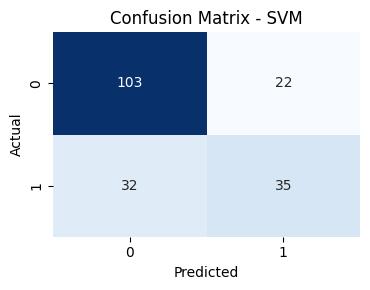

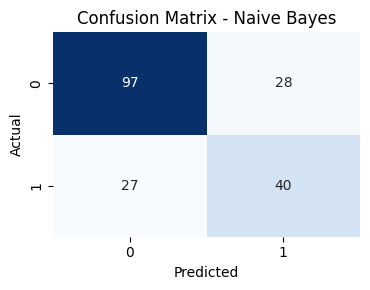

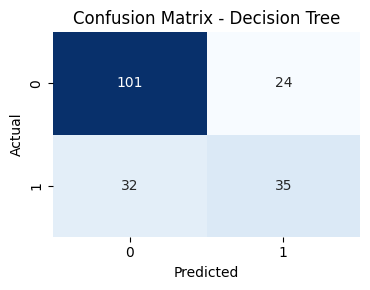

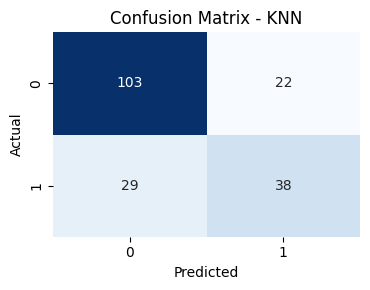

In [14]:
# Confusion matrix visualization
for name, r in results.items():
    plt.figure(figsize=(3.8,3))
    sns.heatmap(r['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [15]:
# Comparison table
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results]
})
print(comparison)

           Model  Accuracy    Recall  Precision  F1-Score
0            SVM  0.718750  0.522388   0.614035  0.564516
1    Naive Bayes  0.713542  0.597015   0.588235  0.592593
2  Decision Tree  0.708333  0.522388   0.593220  0.555556
3            KNN  0.734375  0.567164   0.633333  0.598425


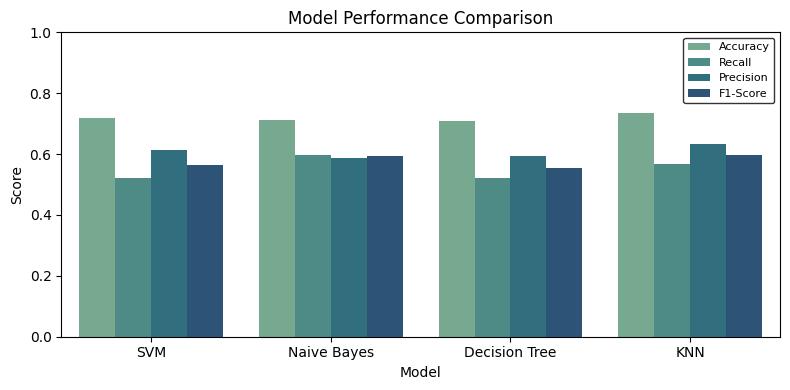

In [16]:
# Bar chart comparison for metrics
plt.figure(figsize=(8,4))
comparison_melt = comparison.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=comparison_melt, x='Model', y='Score', hue='Metric', palette='crest')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.legend(edgecolor='black', fontsize=8)
plt.tight_layout()
plt.show()

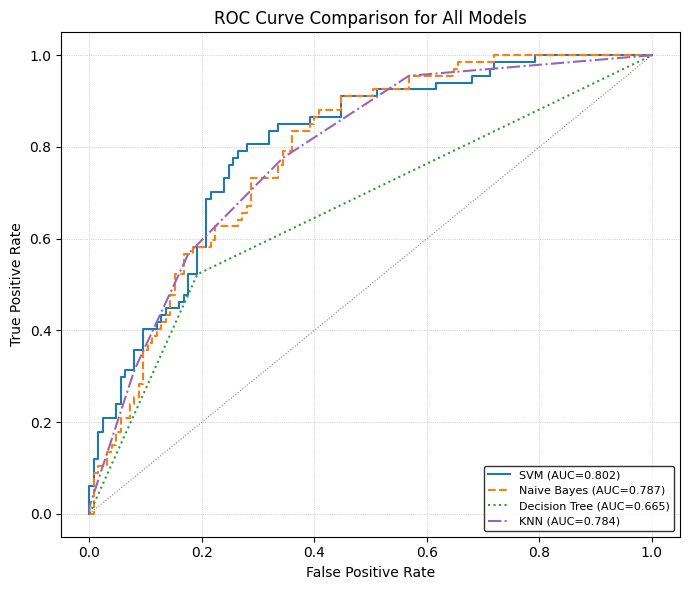

In [17]:
# ROC Curve comparison (improved view)
plt.figure(figsize=(7,6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']
linestyles = ['-', '--', ':', '-.']

for (name, r), ls, col in zip(results.items(), linestyles, colors):
    plt.plot(r['fpr'], r['tpr'], linestyle=ls, color=col, linewidth=1.5,
             label=f"{name} (AUC={r['auc']:.3f})")

plt.plot([0, 1], [0, 1], linestyle=':', linewidth=0.8, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(edgecolor='black', fontsize=8, loc='lower right')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()